# Variable transformers : YeoJohnsonTransformer

The YeoJohnsonTransformer() applies the Yeo-Johnson transformation to the
numerical variables.

**For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:**

Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3

http://jse.amstat.org/v19n3/decock.pdf

https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.transformation import YeoJohnsonTransformer

In [2]:
# Read the separate files
train_df = pd.read_csv('../data/house-prices/train.csv')
test_df = pd.read_csv('../data/house-prices/test.csv')

# Separate features and target in training data
X_train = train_df.drop(['Id', 'SalePrice'], axis=1)
y_train = train_df['SalePrice']

# For test data, you might not have the target variable
X_test = test_df.drop(['Id'], axis=1)  # Note: test data might not have SalePrice column

print("X_train :", X_train.shape)
print("X_test :", X_test.shape)

X_train : (1460, 79)
X_test : (1459, 79)


In [3]:
# initialize transformer to transform 2 variables

yjt = YeoJohnsonTransformer(variables = ['LotArea', 'GrLivArea'])

# find otpimal lambdas for the transformation
yjt.fit(X_train)

YeoJohnsonTransformer(variables=['LotArea', 'GrLivArea'])

In [4]:
# these are the lambdas for the YeoJohnson transformation

yjt.lambda_dict_

{'LotArea': 0.030818532809799352, 'GrLivArea': 0.005539659293536087}

In [5]:
# transform variables

train_t = yjt.transform(X_train)
test_t = yjt.transform(X_test)

Text(0.5, 0, 'GrLivArea')

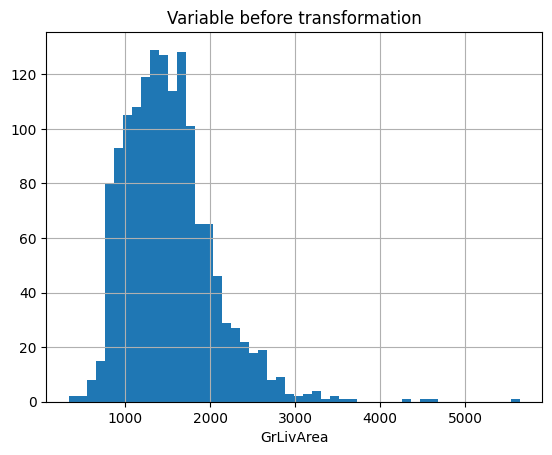

In [6]:
# variable before transformation
X_train['GrLivArea'].hist(bins=50)
plt.title('Variable before transformation')
plt.xlabel('GrLivArea')

Text(0.5, 0, 'GrLivArea')

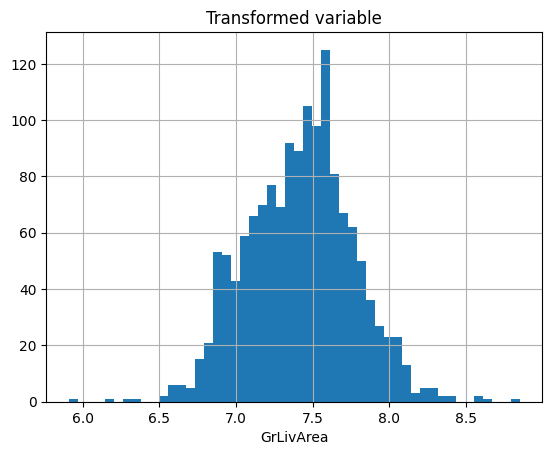

In [7]:
# transformed variable
train_t['GrLivArea'].hist(bins=50)
plt.title('Transformed variable')
plt.xlabel('GrLivArea')

Text(0.5, 0, 'LotArea')

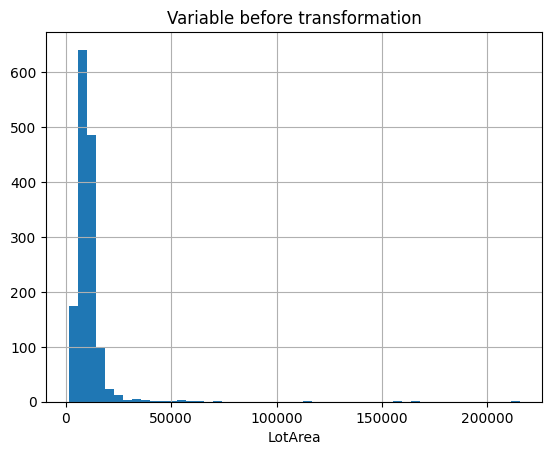

In [8]:
# tvariable before transformation
X_train['LotArea'].hist(bins=50)
plt.title('Variable before transformation')
plt.xlabel('LotArea')

Text(0.5, 0, 'LotArea')

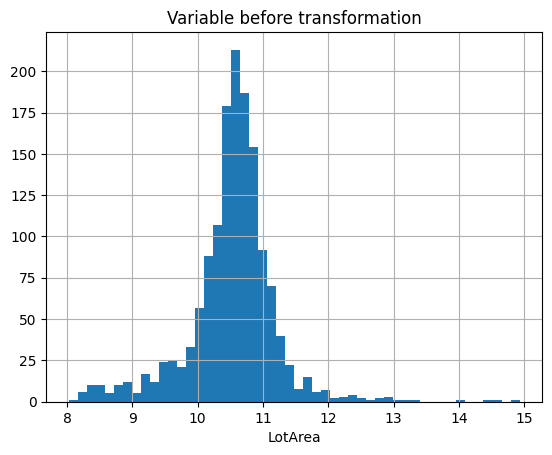

In [9]:
# transformed variable
train_t['LotArea'].hist(bins=50)
plt.title('Variable before transformation')
plt.xlabel('LotArea')

## Automatically select numerical variables

Before using YeoJohnsonTransformer we need to ensure that numerical variables do not have missing data.

In [10]:
# impute missing data

arbitrary_imputer = ArbitraryNumberImputer(arbitrary_number=2)

arbitrary_imputer.fit(X_train)

train_t = arbitrary_imputer.transform(X_train)
test_t = arbitrary_imputer.transform(X_test)

In [11]:
# intializing transformer to transform all variables

yjt = YeoJohnsonTransformer()

yjt.fit(train_t)

YeoJohnsonTransformer()

Note, the run time error is because we are trying to transform integers.

In [12]:
# variables that will be transformed
# (these are the numerical variables in the dataset)

yjt.variables_

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [13]:
# these are the parameters for YeoJohnsonTransformer

yjt.lambda_dict_

{'MSSubClass': -0.22931471762805594,
 'LotFrontage': 0.7961241498738624,
 'LotArea': 0.030818532809799352,
 'OverallQual': 0.6991980357896819,
 'OverallCond': 0.23845916512150375,
 'YearBuilt': 22.127444692295942,
 'YearRemodAdd': 31.775206020135464,
 'MasVnrArea': -0.24223219334559457,
 'BsmtFinSF1': 0.2287256095362253,
 'BsmtFinSF2': -1.52155053597437,
 'BsmtUnfSF': 0.4712723287247936,
 'TotalBsmtSF': 0.7396016886985572,
 '1stFlrSF': -0.0798771182216722,
 '2ndFlrSF': -0.12741731947417528,
 'LowQualFinSF': -10.018636694416859,
 'GrLivArea': 0.005539659293536087,
 'BsmtFullBath': -1.5451806123694918,
 'BsmtHalfBath': -25.32566721658834,
 'FullBath': 0.7664542088369568,
 'HalfBath': -2.2378587530127763,
 'BedroomAbvGr': 0.9317009397981432,
 'KitchenAbvGr': -1.8552607775064576,
 'TotRmsAbvGrd': 0.08005116788146481,
 'Fireplaces': -0.388099741761408,
 'GarageYrBlt': 2.7183976243956756,
 'GarageCars': 1.3456220719405414,
 'GarageArea': 0.81125805465615,
 'WoodDeckSF': -0.07859613168269475,

In [14]:
# transform  variables
train_t = yjt.transform(train_t)
test_t = yjt.transform(test_t)